In [1]:
# soluzione esercizio

In [2]:
path= 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Company.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


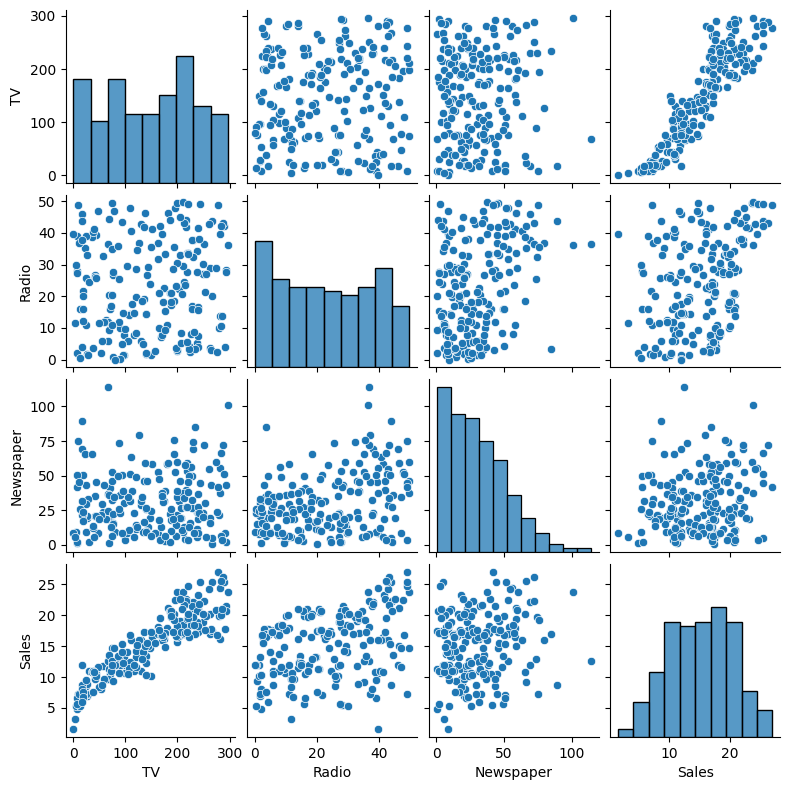

In [8]:
sns.pairplot(df,height=2)

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

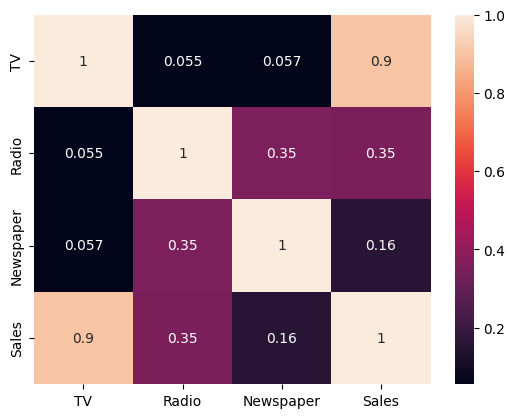

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
TARGET = 'Sales'

X = df.drop(columns=[TARGET])
y = df[TARGET]

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                        test_size=0.25,
                                                        random_state=667,
                                                        )

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
model.intercept_

np.float64(4.695653182275542)

In [17]:
model.coef_

array([0.05448786, 0.09941409, 0.00304925])

In [19]:
y_pred = model.predict(X_test)
y_pred

array([20.24593891, 13.22898175,  9.80546489,  9.3986658 , 13.71438261,
       10.25753101, 18.22377572, 20.96437305,  9.75895872, 10.56000339,
       16.40992342, 21.29464356,  7.14681966, 11.52732981, 18.7981956 ,
        7.87483588, 15.98781642, 15.45465784,  8.62935592, 12.55663029,
        8.98318599,  9.09363282, 24.86010434, 20.62730003, 10.91579583,
       12.26580549,  8.41509399, 18.80889488, 21.4850742 , 13.81630329,
        6.41625134, 22.2157328 ,  7.18700127,  9.68284431, 17.7784414 ,
       11.16485794, 20.40900585,  7.4113414 ,  8.75027309, 15.90544877,
       20.1399785 , 10.80886597,  9.13936715, 21.94938735, 17.18709645,
       14.88064736, 16.69842647, 10.23349654, 12.58658954, 18.06964092])

In [21]:
model.score(X_test,y_test)

0.9274375923929481

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, root_mean_squared_error,r2_score
import numpy as np

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)


print(f"il MAE= {np.round(mae,2)}")
print(f"il MSE= {np.round(mse,2)}")
print(f"il RMSE= {np.round(rmse,2)}")
print(f"il R2_score= {np.round(r2,3)}")

il MAE= 1.01
il MSE= 2.04
il RMSE= 1.43
il R2_score= 0.927


In [28]:
import joblib

In [29]:
joblib.dump(model,'model_company.pkl')

['model_company.pkl']

In [30]:
## testing del modello

loaded_model = joblib.load('model_company.pkl')
loaded_model

LinearRegression()

In [33]:
import warnings
warnings.filterwarnings('ignore')

loaded_model.predict([[44.5,39.3,45.1]])[0]

np.float64(11.164857942416031)